In [1]:
import torch
torch.cuda.is_available()

True

build_dataset.py    kaggle_api.ipynb  README.md		    train_model.py
cloud_script.ipynb  model_backups     test
exploration	    packages	      training_history.png


In [25]:
!git pull https://github.com/Lolleeee/MIEEG

From https://github.com/Lolleeee/MIEEG
 * branch            HEAD       -> FETCH_HEAD
Already up to date.


In [29]:
import shutil
shutil.rmtree('./MIEEG')

In [ ]:
os.chdir("MIEEG")

build_dataset.py    kaggle_api.ipynb  README.md		    train_model.py
cloud_script.ipynb  model_backups     test
exploration	    packages	      training_history.png


In [2]:
!git clone https://github.com/Lolleeee/MIEEG
import os 
os.chdir("MIEEG")


fatal: destination path 'MIEEG' already exists and is not an empty directory.


In [3]:
import numpy as np
matrix = np.array(
    [
        [None, "Fp1", None, "Fp2", None],
        ["F7", "F3", "Fz", "F4", "F8"],
        ["FC5", "FC1", "Cz", "FC2", "FC6"],
        ["T7", "C3", "CP1", "C4", "T8"],
        ["TP9", "CP5", "CP2", "CP6", "TP10"],
        ["P7", "P3", "Pz", "P4", "P8"],
        ["PO9", "O1", "Oz", "O2", "PO10"],
    ]
)

In [ ]:
from packages.train.training import train_model
from packages.train.loss import CustomMSELoss, PerceptualLoss, CustomL1Loss
from packages.io.file_loader import get_data_loaders
import torch
import os

from packages.data_objects.dataset import TorchDataset, CustomTestDataset

dataset_path = "/kaggle/input/0-5subset-datanooverlap"
# Dummy training loop

dataset = TorchDataset(root_folder=dataset_path, chunk_size=10)

train_loader, val_loader, _ = get_data_loaders(dataset, sets_size={'train': 0.7, 'val': 0.3, 'test': 0.}, norm_axes=(0, 1, 5), batch_size = 64)
# norm_params = train_loader.dataset.dataset._norm_params

Calculating global parameters: 100%|██████████| 87/87 [00:12<00:00,  6.97it/s]


Calculated mean shape: torch.Size([1, 25, 7, 5, 1]), std shape: torch.Size([1, 25, 7, 5, 1])


6 0 ['Dim 0', 'Dim 1', 'Dim 2', 'Dim 3']


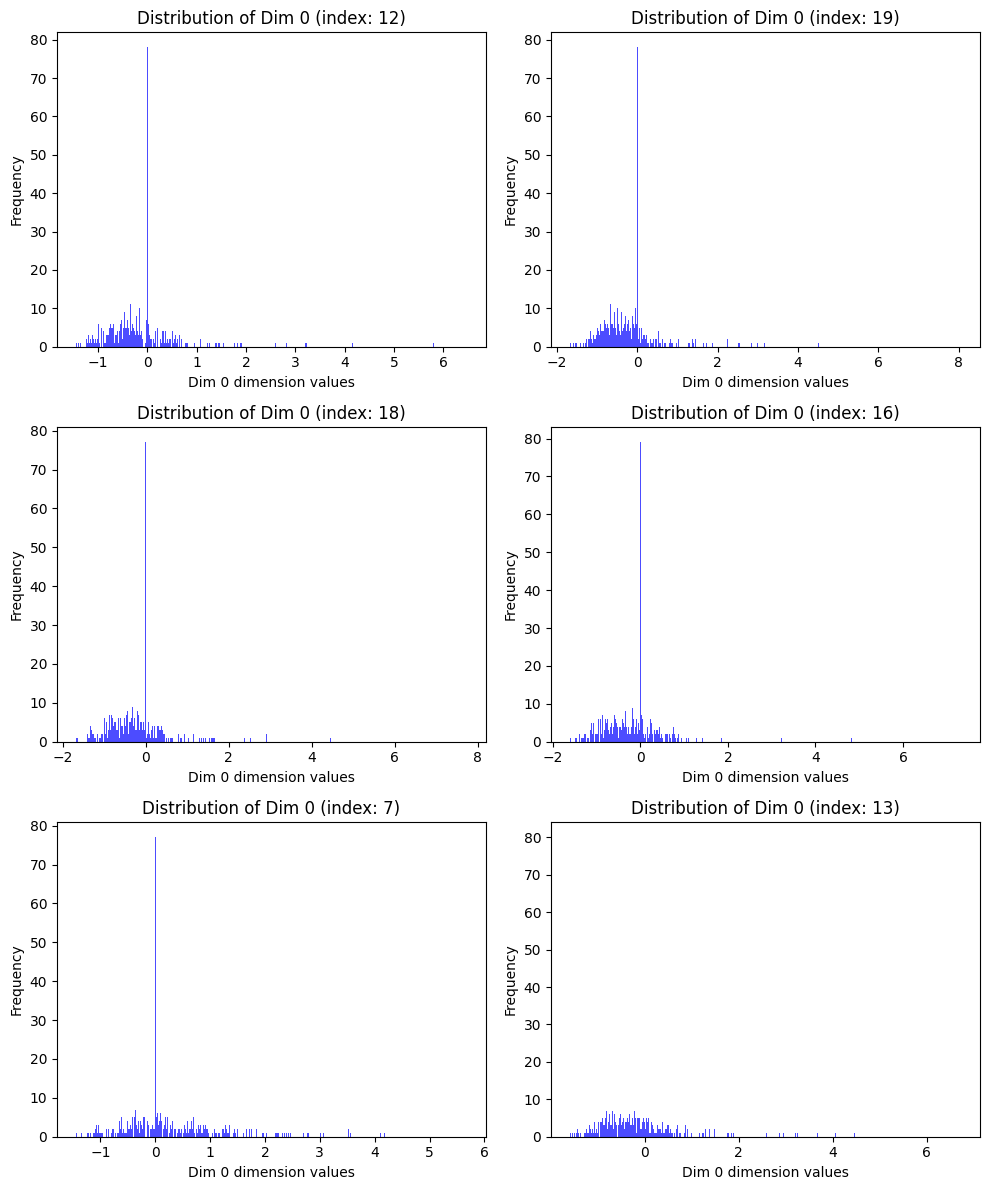

In [19]:

from packages.plotting.tensor_plots import plot_dimension_distribuitions
#train_loader.dataset.dataset._norm_params = norm_params
plot_dimension_distribuitions(next(iter(train_loader))[0, 0, ...])

In [5]:
optimizer = torch.optim.AdamW
from packages.models.vqae import SequenceProcessor, VQVAE
from packages.train.loss import VQVAELoss, SequenceVQVAELoss
model = SequenceProcessor(chunk_shape=(25, 7, 5, 25), embedding_dim=128, codebook_size=64, use_quantizer=False)
mae = torch.nn.L1Loss
criterion = SequenceVQVAELoss(
    recon_loss_type='mse',
    recon_weight=1.0
)
config = {
    'lr': 1e-4,
    'weight_decay': 1e-3,
    'epochs': 50,
    #'EarlyStopping' : {'patience': 20, 'min_delta': 0.01},
    'BackupManager': {'backup_interval': 10, 'backup_path': './model_backups'},
    #'ReduceLROnPlateau': {'mode': 'min', 'patience': 5, 'factor': 0.0},
    'history_plot': {'plot_type': 'extended', 'save_path': './training_history'},
    'grad_clip': 1.0,
    'use_amp': False,
    #'grad_logging_interval' : 10,
    'asym_lr': None
}

model = train_model(model, train_loader=train_loader, val_loader=val_loader, loss_criterion=criterion, optimizer=optimizer, config=config, metrics={})

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.8055
[INFO] Val Loss: 0.7398
[INFO] Best model saved at epoch 1 with metric 0.7398


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.6640
[INFO] Val Loss: 0.6465
[INFO] Best model saved at epoch 2 with metric 0.6465


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.5947
[INFO] Val Loss: 0.5924
[INFO] Best model saved at epoch 3 with metric 0.5924


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.5551
[INFO] Val Loss: 0.5570
[INFO] Best model saved at epoch 4 with metric 0.5570


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.5268
[INFO] Val Loss: 0.5347
[INFO] Best model saved at epoch 5 with metric 0.5347


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.5097
[INFO] Val Loss: 0.5161
[INFO] Best model saved at epoch 6 with metric 0.5161


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.4918
[INFO] Val Loss: 0.5014
[INFO] Best model saved at epoch 7 with metric 0.5014


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.4806
[INFO] Val Loss: 0.4883
[INFO] Best model saved at epoch 8 with metric 0.4883


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.4689
[INFO] Val Loss: 0.4791
[INFO] Best model saved at epoch 9 with metric 0.4791


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.4593
[INFO] Val Loss: 0.4688
[INFO] Best model saved at epoch 10 with metric 0.4688


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.4503
[INFO] Val Loss: 0.4605
[INFO] Best model saved at epoch 11 with metric 0.4605


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.4428
[INFO] Val Loss: 0.4566
[INFO] Best model saved at epoch 12 with metric 0.4566


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.4367
[INFO] Val Loss: 0.4491
[INFO] Best model saved at epoch 13 with metric 0.4491


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.4315
[INFO] Val Loss: 0.4444
[INFO] Best model saved at epoch 14 with metric 0.4444


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.4255
[INFO] Val Loss: 0.4369
[INFO] Best model saved at epoch 15 with metric 0.4369


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.4200
[INFO] Val Loss: 0.4357
[INFO] Best model saved at epoch 16 with metric 0.4357


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.4204
[INFO] Val Loss: 0.4297
[INFO] Best model saved at epoch 17 with metric 0.4297


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.4115
[INFO] Val Loss: 0.4241
[INFO] Best model saved at epoch 18 with metric 0.4241


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.4103
[INFO] Val Loss: 0.4215
[INFO] Best model saved at epoch 19 with metric 0.4215


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.4045
[INFO] Val Loss: 0.4174
[INFO] Best model saved at epoch 20 with metric 0.4174


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.4009
[INFO] Val Loss: 0.4126
[INFO] Best model saved at epoch 21 with metric 0.4126


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.3978
[INFO] Val Loss: 0.4093
[INFO] Best model saved at epoch 22 with metric 0.4093


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.3953
[INFO] Val Loss: 0.4090
[INFO] Best model saved at epoch 23 with metric 0.4090


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.3931
[INFO] Val Loss: 0.4048
[INFO] Best model saved at epoch 24 with metric 0.4048


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.3921
[INFO] Val Loss: 0.4039
[INFO] Best model saved at epoch 25 with metric 0.4039


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.3876
[INFO] Val Loss: 0.3979
[INFO] Best model saved at epoch 26 with metric 0.3979


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.3861
[INFO] Val Loss: 0.4020


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.3839
[INFO] Val Loss: 0.3934
[INFO] Best model saved at epoch 28 with metric 0.3934


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.3791
[INFO] Val Loss: 0.3913
[INFO] Best model saved at epoch 29 with metric 0.3913


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.3776
[INFO] Val Loss: 0.3902
[INFO] Best model saved at epoch 30 with metric 0.3902


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.3772
[INFO] Val Loss: 0.3945


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.3765
[INFO] Val Loss: 0.3882
[INFO] Best model saved at epoch 32 with metric 0.3882


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.3750
[INFO] Val Loss: 0.3847
[INFO] Best model saved at epoch 33 with metric 0.3847


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.3699
[INFO] Val Loss: 0.3824
[INFO] Best model saved at epoch 34 with metric 0.3824


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.3705
[INFO] Val Loss: 0.3848


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

[INFO] Train Loss: 0.3697
[INFO] Val Loss: 0.3835


Training Batches:   0%|          | 0/87 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [4]:
from packages.train.training import train_model
from packages.train.loss import CustomMSELoss, PerceptualLoss, CustomL1Loss
from packages.io.file_loader import get_data_loaders
import torch
import os

from packages.data_objects.dataset import TorchDataset, CustomTestDataset

dataset_path = "/kaggle/input/64nooverlap05"
# Dummy training loop

dataset = TorchDataset(root_folder=dataset_path)

train_loader, val_loader, _ = get_data_loaders(dataset, sets_size={'train': 0.7, 'val': 0.3}, norm_axes=(0, 4), batch_size = 64)


Calculating global parameters: 100%|██████████| 338/338 [00:46<00:00,  7.23it/s]

Calculated mean shape: torch.Size([25, 7, 5, 1]), std shape: torch.Size([25, 7, 5, 1])


In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1 = VQVAE(input_spatial=(7, 5 ,64), embedding_dim=512, codebook_size=64)
model1.to(device)
for batch in train_loader:
    with torch.no_grad():
        batch = batch.to(device)
        x = batch
        z = model1.encoder(x)               # change to how you get pre-quant z
        z_flat = z.view(z.size(0), -1)
        z_std = z_flat.std(dim=1).mean().item()
        z_mean = z_flat.mean().item()

        x_std = x.view(x.size(0), -1).std(dim=1).mean().item()
        x_mean = x.view(x.size(0), -1).mean().item()

        print(f"Input Std: {x_std:.4f}, Mean: {x_mean:.4f} | Pre-Quantization Latent Std: {z_std:.4f}, Mean: {z_mean:.4f}")
        
        _, _, indices = model.vq(z)
        unique_codes = len(torch.unique(indices))
        print(f"Unique codes used: {unique_codes}/{model.vq.num_embeddings}")

Input Std: 0.8316, Mean: -0.0368 | Pre-Quantization Latent Std: 0.5912, Mean: 0.2777
Unique codes used: 60/64
Input Std: 0.9212, Mean: 0.0623 | Pre-Quantization Latent Std: 0.5911, Mean: 0.2766
Unique codes used: 59/64
Input Std: 0.8358, Mean: -0.0418 | Pre-Quantization Latent Std: 0.5915, Mean: 0.2772
Unique codes used: 60/64
Input Std: 0.8723, Mean: -0.0225 | Pre-Quantization Latent Std: 0.5909, Mean: 0.2776
Unique codes used: 61/64
Input Std: 0.8803, Mean: 0.0376 | Pre-Quantization Latent Std: 0.5918, Mean: 0.2769
Unique codes used: 58/64
Input Std: 0.8995, Mean: 0.0370 | Pre-Quantization Latent Std: 0.5914, Mean: 0.2773
Unique codes used: 57/64
Input Std: 0.8494, Mean: -0.0384 | Pre-Quantization Latent Std: 0.5917, Mean: 0.2773
Unique codes used: 58/64
Input Std: 0.8678, Mean: -0.0077 | Pre-Quantization Latent Std: 0.5918, Mean: 0.2775
Unique codes used: 62/64
Input Std: 0.8282, Mean: -0.0334 | Pre-Quantization Latent Std: 0.5910, Mean: 0.2777
Unique codes used: 61/64
Input Std: 0.

KeyboardInterrupt: 

In [7]:

optimizer = torch.optim.AdamW
from packages.models.vqae import SequenceProcessor, VQVAE
from packages.train.loss import VQVAELoss, SequenceVQVAELoss
model = VQVAE(input_spatial=(7, 5 ,64), embedding_dim=512, codebook_size=64, use_quantizer=False)
mae = torch.nn.L1Loss
criterion = VQVAELoss(
    recon_loss_type='mse',
    recon_weight=1.0,
)
config = {
    'lr': 1e-3,
    'weight_decay': 1e-3,
    'epochs': 50,
    #'EarlyStopping' : {'patience': 20, 'min_delta': 0.01},
    'BackupManager': {'backup_interval': 10, 'backup_path': './model_backups'},
    #'ReduceLROnPlateau': {'mode': 'min', 'patience': 5, 'factor': 0.0},
    'history_plot': {'plot_type': 'extended', 'save_path': './training_history'},
    'grad_clip': 1.0,
    'use_amp': False,
    'grad_logging_interval' : 20,
    'asym_lr': None
}

model = train_model(model, train_loader=train_loader, val_loader=val_loader, loss_criterion=criterion, optimizer=optimizer, config=config, metrics={})

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Training Batches:   0%|          | 0/338 [00:00<?, ?it/s]

[INFO] Gradient norm for encoder.0.weight: 0.1138
[INFO] Gradient norm for encoder.1.weight: 0.0125
[INFO] Gradient norm for encoder.1.bias: 0.0138
[INFO] Gradient norm for encoder.3.weight: 0.0849
[INFO] Gradient norm for encoder.4.weight: 0.0075
[INFO] Gradient norm for encoder.4.bias: 0.0065
[INFO] Gradient norm for encoder.6.weight: 0.0443
[INFO] Gradient norm for encoder.7.weight: 0.0034
[INFO] Gradient norm for encoder.7.bias: 0.0024
[INFO] Gradient norm for to_embedding.1.weight: 0.0136
[INFO] Gradient norm for to_embedding.1.bias: 0.0002
[INFO] Gradient norm for to_embedding.2.weight: 0.0009
[INFO] Gradient norm for to_embedding.2.bias: 0.0008
[INFO] Gradient norm for to_embedding.4.weight: 0.0120
[INFO] Gradient norm for to_embedding.4.bias: 0.0005


AttributeError: 'NoneType' object has no attribute 'norm'

In [8]:
print(model)

VQVAE(
  (encoder): Sequential(
    (0): Conv3d(25, 64, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
    (1): GroupNorm(1, 64, eps=1e-05, affine=True)
    (2): GELU(approximate='none')
    (3): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(2, 1, 2), padding=(1, 1, 1), bias=False)
    (4): GroupNorm(1, 128, eps=1e-05, affine=True)
    (5): GELU(approximate='none')
    (6): Conv3d(128, 256, kernel_size=(3, 3, 3), stride=(1, 1, 2), padding=(1, 1, 1), bias=False)
    (7): GroupNorm(1, 256, eps=1e-05, affine=True)
    (8): GELU(approximate='none')
  )
  (to_embedding): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=12288, out_features=1024, bias=True)
    (2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (3): GELU(approximate='none')
    (4): Linear(in_features=1024, out_features=512, bias=True)
  )
  (vq): VectorQuantizer()
  (from_embedding): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=Tr

In [30]:
from packages.train.testing import autoencoder_test_plots
autoencoder_test_plots(model, val_loader, nsamples = 5)

torch.Size([7, 10, 25, 7, 5, 25])


/kaggle/working/MIEEG/packages/train/testing.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(inputs).to(device)


TypeError: expected Tensor as element 0 in argument 0, but got tuple

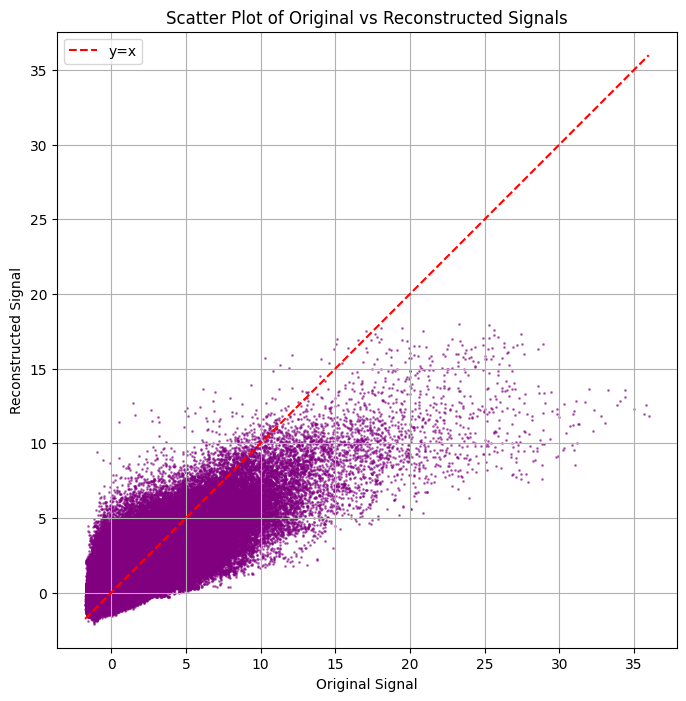

AssertionError: Input data must be 4D (freq, channels, channels, time).

In [7]:
from packages.plotting.reconstruction_plots import plot_reconstruction_slices
import numpy as np

import torch
from packages.plotting.reconstruction_plots import plot_reconstruction_scatter

# --- Load model and parameters ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
#model.load_state_dict(torch.load("/kaggle/working/MIEEG/model_backups/best_model_epoch_25.pt", map_location="cpu"))
model.eval()
# --- Prepare input data ---
input_data = next(iter(val_loader))  # Replace with your actual input
input_data = input_data.to(device)
# --- Get reconstruction ---
with torch.no_grad():
    reconstructed = model(input_data)
    if isinstance(reconstructed, tuple):
        reconstructed = reconstructed[0]

# --- Plot reconstruction scatter ---
plot_reconstruction_scatter(input_data, reconstructed)

batch_size = config.get('batch_size', 31)
i = np.random.randint(0, batch_size)
if isinstance(reconstructed, tuple):
    reconstructed = reconstructed[0]
plot_reconstruction_slices(input_data[i,...], reconstructed[i,...], freqs=[4,15,22])